In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('04_01_empleados.csv', delimiter=";")

In [3]:
print(df.head())

      Nombre       Sexo Estado_Civil  Edad  Experiencia  Salario Gerencia  \
0  Alexandro  Masculino   Soltero(a)    22            3     2423       No   
1     Felipa   Femenino   Soltero(a)    26            5     2639       No   
2     Daniel  Masculino    Casado(a)    35           10     3122       No   
3       John  Masculino    Casado(a)    35           13     3431       Sí   
4    Ruperta   Femenino    Casado(a)    54           18     3962       No   

           Departamento  
0            Publicidad  
1             Comercial  
2             Comercial  
3  Servicios al cliente  
4              Producto  


- Regresión lineal: algoritmo de aprendizaje automático supervisado.
    - Modela la relación entre dos o más variables, ajustando la recta a los datos
    - Predice el valor de una variable en función de otra(s) variables

- Desafío: Encontrar la relación entre las variables experiencia y salario, utilizando nuestro dataframe. 
    1. Dividir nuestro dataframe en dos matrices:
        - La matriz 1 contendrá las características dependientes (salario)
        - La matriz independiente o destino (experiencia)
    2. Usar el 80% de los datos para entrenar el modelo y el otro 20% para probarlo. Hacer uso de la función train_test_split de scikit-learn

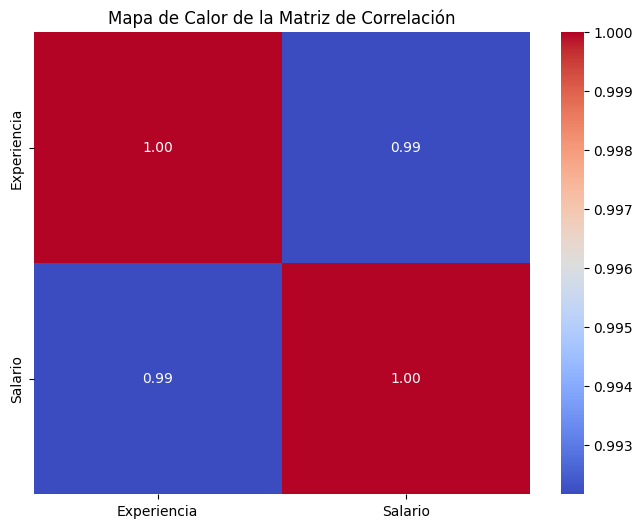

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

matriz_correlacion = df[["Experiencia", "Salario"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

In [5]:
X = df[["Experiencia"]]
y = df[["Salario"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Coeficiente de regresión: {model.coef_}")

y_pred = model.predict(X_test)

Coeficiente de regresión: [[107.80976418]]


In [6]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')

rmse = np.sqrt(mse)
print(f'Error Cuadrático Medio Raíz (RMSE): {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'Coeficiente de Determinación (R^2): {r2}')

Error Cuadrático Medio (MSE): 9497.197444042888
Error Cuadrático Medio Raíz (RMSE): 97.45356557890987
Coeficiente de Determinación (R^2): 0.9900562095952324


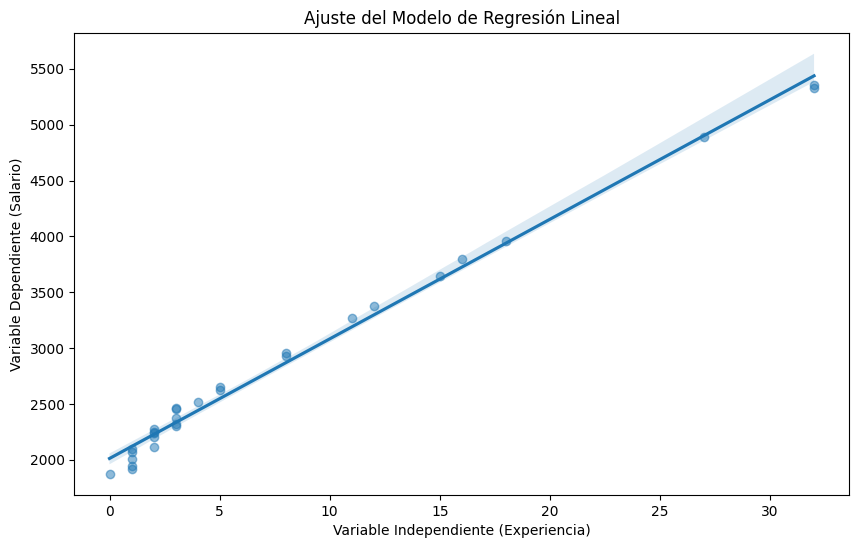

In [7]:
feature_name = 'Experiencia'
target_name = 'Salario'

plot_df = pd.DataFrame({
    feature_name: X_test[feature_name].values.flatten(),
    'Valores Reales': y_test[target_name].values.flatten(),
    'Predicciones': np.transpose(y_pred).flatten()
})

plt.figure(figsize=(10, 6))
sns.regplot(x=feature_name, y='Valores Reales', data=plot_df, scatter_kws={'alpha':0.5})

plt.title('Ajuste del Modelo de Regresión Lineal')
plt.xlabel(f'Variable Independiente ({feature_name})')
plt.ylabel(f'Variable Dependiente ({target_name})')
plt.show()